In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import rankdata, chi2

### Analyses of cortical layer thickness between mammalian clades and across developmental stages

This notebook aims to address the statistical considerations regarding the analysis of histological data. 
The histological data compares cortical histological samples taken from two species, *Mus musculus* and *Sminthopsis crassicaudata* and also examines how layer thickness, as a proportion of total cortical thickness, varies across equivalent developmental stages. 


#### Framing the statistical approach

We are interested in comparing the proportional thickness of cortical layers between species and across developmental stages. To this end, we are interested in two factors: species (between-subejcts; 2 levels) and developmental stages (between-subjects; 6 levels). We are working with small-ish numbers and underlying statistical assumptions are the first things to be considered.

##### *Precedent*

While not the most important consideration, precedent established by prior and related published work should be considered. This provides some basis for what is done already in the field and gives us some insight into the collective approach to analysing related data. To begin, the work described by [Hutsler et al. (2005)](https://reader.elsevier.com/reader/sd/pii/S0006899305008528?token=155C8303515DA46D905B5DE6972AD21709B82B04ABF8A9DE8AD8A2F477E520E33E857E7A470303ACCA185281E86789DE&originRegion=us-east-1&originCreation=20230502030258) is a good place to start. They compared rodent and primate sensory cortices, looking both at absolute and proportions of layer thickness. Absolute measurements are informative but are inappropriate for inter-species comparisons. Hence, the authors compare both absolute and proportional measurements. Importantly, for their first comparison (Fig. 2.), they examine only layers II/III and V/VI and they do this using two separate tests.

##### *Interpretation of the precedent*
When it comes to proportions comparisons, what are we interested in? 

I think want an answer to "is there a difference between the proportion of layer 2/3 in mouse cortex to the proportion of layer 2/3 in dunnart cortex?".
Initially, this might seem fairly easy, we have one between-subjects factor, 'Species' with 2 levels, and we have a single dependent variable, which is the normalised width of the layer 2/3 to the rest of the cortex. This could be a t-test or Mann-Whitney U test depending on assumptions. So what is the problem with this? Well, we might want to compare not only layer 2/3 between species but also layer 4, and layer 5, etc. 
This means that we increasing the **number** of comparisons (needs to be corrected for) and each of the dependent variables we are looking at are likely to be correlated (e.g., as the proportion of cortex that layer 2/3 occupies, the proportion of occupieid by layer 4 might go down). As it stands, this is not modelled in our data. How might this be modelled?


In [16]:
data = pd.read_excel("/Users/dylan/OneDrive - The University of Queensland/Desktop/LauraF/sample_data_dab.xlsx", sheet_name=2)
data.head()

,Species,Stage,98PERDL
0,Ms,21,73.333206
1,Ms,21,70.897676
2,Ms,21,63.891195
3,Ms,21,70.675085
4,Ms,21,71.087947


In [22]:
# Fit the MANOVA model using the from_formula method
manova_model = MANOVA.from_formula('VZ + IZ + L56 + L23 ~ Species', data=data)
manova_results = manova_model.mv_test()
print(manova_results.summary())

                                 Multivariate linear model
                                                                                            
--------------------------------------------------------------------------------------------
       Intercept                Value          Num DF  Den DF         F Value         Pr > F
--------------------------------------------------------------------------------------------
          Wilks' lambda                -0.0000 4.0000 11.0000 -12384898975268866.0000 1.0000
         Pillai's trace                 1.0000 4.0000 11.0000 -12384898975268866.0000 1.0000
 Hotelling-Lawley trace -4503599627370497.0000 4.0000 11.0000 -12384898975268866.0000 1.0000
    Roy's greatest root -4503599627370497.0000 4.0000 11.0000 -12384898975268866.0000 1.0000
--------------------------------------------------------------------------------------------
                                                                                            
-----------

In [35]:
# Fit the MANOVA model using the from_formula method
manova_model = MANOVA.from_formula('WMVZ + L6 + L5 + L24 + MZ ~ Condition', data=data)
manova_results = manova_model.mv_test()
print(manova_results.summary())

                                Multivariate linear model
                                                                                         
-----------------------------------------------------------------------------------------
       Intercept                Value          Num DF Den DF        F Value        Pr > F
-----------------------------------------------------------------------------------------
          Wilks' lambda                -0.0000 5.0000 2.0000 -450359962737050.0000 1.0000
         Pillai's trace                 1.0000 5.0000 2.0000 -450359962737050.0000 1.0000
 Hotelling-Lawley trace -1125899906842625.0000 5.0000 1.0000 -225179981368525.0000 1.0000
    Roy's greatest root -1125899906842625.0000 5.0000 2.0000 -450359962737050.0000 1.0000
-----------------------------------------------------------------------------------------
                                                                                         
------------------------------------------

In [6]:
data2 = pd.read_excel("/Users/dylan/OneDrive - The University of Queensland/Desktop/LauraF/sample_data_dab.xlsx", sheet_name=0)
data2.head()

,Species,VZ,IZ,L56,L23
0,MS,100.000000,0.000000,0.0,0.0
1,MS,100.000000,0.000000,0.0,0.0
2,MS,99.310345,0.689655,0.0,0.0
3,MS,97.701149,2.298851,0.0,0.0
4,MS,100.000000,0.000000,0.0,0.0


In [ ]:
# SRH test 
# Load your dataset
data = pd.read_csv('your_dataset.csv')

# Replace 'Factor1', 'Factor2', and 'DV' with the appropriate column names in your dataset
# Compute the ranks for the dependent variable (DV)
data['Ranks'] = rankdata(data['DV'])

# Calculate the sum of ranks for each combination of Factor1 and Factor2 levels
rank_sums = data.groupby(['Factor1', 'Factor2'])['Ranks'].sum()

# Calculate the total number of observations (N), levels of Factor1 (A), and levels of Factor2 (B)
N = len(data)
A = len(data['Factor1'].unique())
B = len(data['Factor2'].unique())

# Compute the test statistics H1, H2, and H12
H1 = 12 / (N * (N + 1)) * np.sum(rank_sums.groupby('Factor1').sum() ** 2) / B - 3 * (N + 1)
H2 = 12 / (N * (N + 1)) * np.sum(rank_sums.groupby('Factor2').sum() ** 2) / A - 3 * (N + 1)
H12 = 12 / (N * (N + 1)) * np.sum(rank_sums ** 2) - 3 * (N + 1)

# Compute the error term H3
H3 = H12 - H1 - H2

# Calculate the degrees of freedom for each factor and interaction
df1 = A - 1
df2 = B - 1
df12 = (A - 1) * (B - 1)
df3 = N - A * B

# Compute the chi-square test statistics for each factor and interaction
chi_square_H1 = H1 / df1
chi_square_H2 = H2 / df2
chi_square_H12 = H12 / df12
chi_square_H3 = H3 / df3

# Compute the p-values for each factor and interaction
p_value_H1 = 1 - chi2.cdf(chi_square_H1, df1)
p_value_H2 = 1 - chi2.cdf(chi_square_H2, df2)
p_value_H12 = 1 - chi2.cdf(chi_square_H12, df12)

# Print the results
print("Factor1: Chi-square =", chi_square_H1, "p-value =", p_value_H1)
print("Factor2: Chi-square =", chi_square_H2, "p-value =", p_value_H2)
print("Interaction: Chi-square =", chi_square_H12, "p-value =", p_value_H12)


In [ ]:
# Peform two-way ANOVA with interaction and get the residuals
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load your dataset
data = pd.DataFrame({
    'DV': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'IV1': ['A', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'A'],
    'IV2': ['X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y']
})

# Fit the two-way ANOVA model with interaction
model = ols('DV ~ C(IV1) * C(IV2)', data=data).fit()
residuals = model.resid

In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Factor_2', ylabel='Response'>

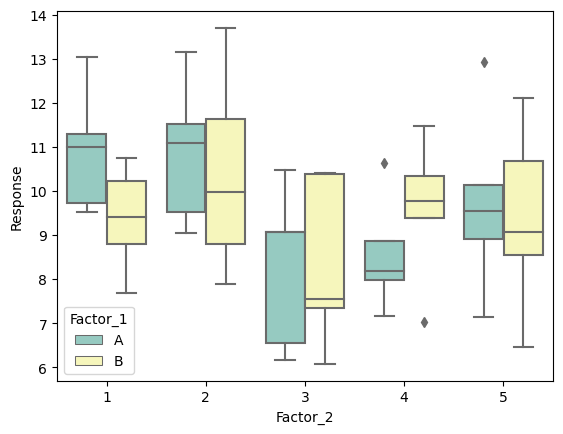

In [11]:
np.random.seed(42)

# Generate sample data
data = {
    'Factor_1': ['A'] * 25 + ['B'] * 25,
    'Factor_2': (['1'] * 5 + ['2'] * 5 + ['3'] * 5 + ['4'] * 5 + ['5'] * 5) * 2,
    'Response': np.random.normal(10, 2, 50)
}

# Load data into a pandas DataFrame
df = pd.DataFrame(data)
sns.boxplot(x='Factor_2', y='Response', hue='Factor_1', data=df, palette='Set3')

In [13]:
import pandas as pd
from scipy import stats

# Assuming df is a DataFrame with columns 'Factor_1', 'Factor_2', 'Response'
model = pd.pivot_table(df, values='Response', index=['Factor_1', 'Factor_2'], aggfunc='mean')
df['Predicted'] = df.apply(lambda x: model.loc[x['Factor_1'], x['Factor_2']], axis=1)
df['Residuals'] = df['Response'] - df['Predicted']

# Testing for normality on the pooled residuals
test_statistic, p_value = stats.shapiro(df['Residuals'])
print(f"Test statistic = {test_statistic}, p-value = {p_value}")



Test statistic = 0.9759570956230164, p-value = 0.3966571092605591


In [17]:
data.head()

,Species,Stage,98PERDL
0,Ms,21,73.333206
1,Ms,21,70.897676
2,Ms,21,63.891195
3,Ms,21,70.675085
4,Ms,21,71.087947


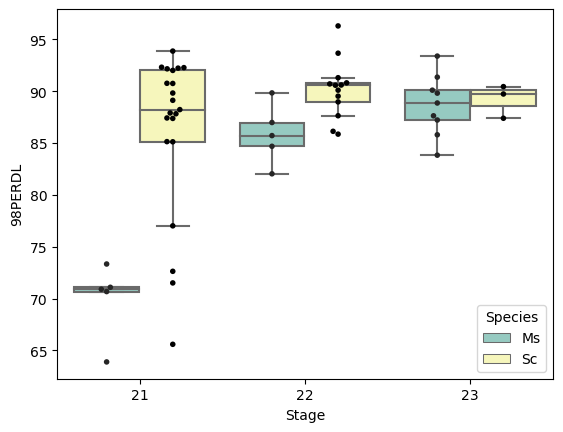

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Stage', y='98PERDL', hue='Species', data=data, palette='Set3', showfliers=False)
swarmplot = sns.swarmplot(x='Stage', y='98PERDL', hue='Species', data=data, palette='dark:k', dodge=True, size=4)

# Get the handles and labels from the swarmplot.
handles, labels = swarmplot.get_legend_handles_labels()

# Remove the duplicate legend entries by selecting unique labels and their corresponding handles.
unique_labels, indices = np.unique(labels, return_index=True)
unique_handles = [handles[i] for i in indices]

# Create a legend with the unique handles and labels.
plt.legend(unique_handles, unique_labels, loc='lower right', title='Species')

plt.show()


In [27]:
# Assuming df is a DataFrame with columns 'Factor_1', 'Factor_2', 'Response'
model = pd.pivot_table(data, values='98PERDL', index=['Stage', 'Species'], aggfunc='mean')
data['Predicted'] = data.apply(lambda x: model.loc[x['Stage'], x['Species']], axis=1)
data['Residuals'] = data['98PERDL'] - data['Predicted']

# Testing for normality on the pooled residuals
test_statistic, p_value = stats.shapiro(data['Residuals'])
print(f"Test statistic = {test_statistic}, p-value = {p_value}")

Test statistic = 0.8417494297027588, p-value = 3.3696148875606013e-06


In [29]:
import pingouin as pg
pg.pairwise_tests(data, dv='98PERDL', between=['Stage','Species'], parametric=False, padjust='sidak')

,Contrast,Stage,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,hedges
0,Stage,-,21,22,False,False,179.0,two-sided,0.193278,0.474986,sidak,-0.739271
1,Stage,-,21,23,False,False,125.0,two-sided,0.338157,0.710089,sidak,-0.678942
2,Stage,-,22,23,False,False,115.0,two-sided,0.783188,0.989808,sidak,0.053642
3,Species,-,Ms,Sc,False,False,195.0,two-sided,0.006942,NaN,NaN,-0.666183
4,Stage * Species,21,Ms,Sc,False,False,6.0,two-sided,0.000882,0.002643,sidak,-2.159598
5,Stage * Species,22,Ms,Sc,False,False,7.0,two-sided,0.009804,0.029124,sidak,-1.450958
6,Stage * Species,23,Ms,Sc,False,False,12.0,two-sided,0.863636,0.997464,sidak,-0.178595
